In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
import sklearn
import pickle
import importlib.util

In [2]:
# importing utility file 
spec = importlib.util.spec_from_file_location("Util","/home/user/PycharmProjects/Machine-Learning-Fellowship/week12/utility_class.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
util_obj = foo.Util()

In [3]:
#read and load csv file
data_module= pd.read_csv("USCensus1990.data.txt",nrows=1000)
data_module.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [4]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
caseid       1000 non-null int64
dAge         1000 non-null int64
dAncstry1    1000 non-null int64
dAncstry2    1000 non-null int64
iAvail       1000 non-null int64
iCitizen     1000 non-null int64
iClass       1000 non-null int64
dDepart      1000 non-null int64
iDisabl1     1000 non-null int64
iDisabl2     1000 non-null int64
iEnglish     1000 non-null int64
iFeb55       1000 non-null int64
iFertil      1000 non-null int64
dHispanic    1000 non-null int64
dHour89      1000 non-null int64
dHours       1000 non-null int64
iImmigr      1000 non-null int64
dIncome1     1000 non-null int64
dIncome2     1000 non-null int64
dIncome3     1000 non-null int64
dIncome4     1000 non-null int64
dIncome5     1000 non-null int64
dIncome6     1000 non-null int64
dIncome7     1000 non-null int64
dIncome8     1000 non-null int64
dIndustry    1000 non-null int64
iKorean      1000 non-null int64
iLa

In [5]:
data_module.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,10499.500000,3.853000,3.34900,1.658000,0.140000,0.26000,1.212000,1.305000,1.434000,1.473000,...,0.842000,1.441000,0.03400,0.830000,1.009000,1.123000,0.033000,8.34200,1.898000,0.128000
std,288.819436,2.039007,4.08851,1.895423,0.727275,0.92046,1.752749,1.687846,0.842825,0.844976,...,1.329964,1.956105,0.18132,0.864782,0.688035,0.744597,0.178726,4.04319,2.185949,0.379157
min,10000.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10249.750000,2.000000,1.00000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,5.00000,1.000000,0.000000
50%,10499.500000,4.000000,1.00000,1.000000,0.000000,0.00000,1.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,10.00000,1.000000,0.000000
75%,10749.250000,6.000000,3.00000,2.000000,0.000000,0.00000,1.000000,3.000000,2.000000,2.000000,...,3.000000,3.000000,0.00000,2.000000,1.000000,2.000000,0.000000,11.00000,2.000000,0.000000
max,10999.000000,7.000000,11.00000,12.000000,4.000000,4.00000,9.000000,5.000000,2.000000,2.000000,...,3.000000,6.000000,1.00000,2.000000,2.000000,2.000000,1.000000,17.00000,7.000000,2.000000


In [6]:
#check null value
data_module.isnull().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
iCitizen     0
iClass       0
dDepart      0
iDisabl1     0
iDisabl2     0
iEnglish     0
iFeb55       0
iFertil      0
dHispanic    0
dHour89      0
dHours       0
iImmigr      0
dIncome1     0
dIncome2     0
dIncome3     0
dIncome4     0
dIncome5     0
dIncome6     0
dIncome7     0
dIncome8     0
dIndustry    0
iKorean      0
iLang1       0
iLooking     0
iMarital     0
            ..
dPoverty     0
dPwgt1       0
iRagechld    0
dRearning    0
iRelat1      0
iRelat2      0
iRemplpar    0
iRiders      0
iRlabor      0
iRownchld    0
dRpincome    0
iRPOB        0
iRrelchld    0
iRspouse     0
iRvetserv    0
iSchool      0
iSept80      0
iSex         0
iSubfam1     0
iSubfam2     0
iTmpabsnt    0
dTravtime    0
iVietnam     0
dWeek89      0
iWork89      0
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [7]:
#remove duplicate value
data_module.duplicated().sum()

0

In [8]:
# x_train=data_module.iloc[:,[3,4]].values
x_train=data_module.iloc[:1000].values
x_train.shape

(1000, 69)

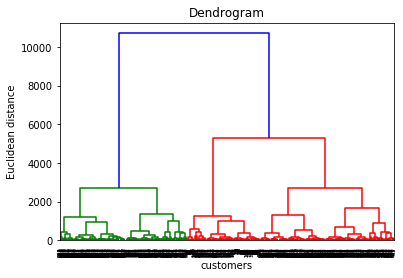

In [9]:
#using dendrogram to find optimal no. of clusters.
dendrogram= sch.dendrogram(sch.linkage(x_train,method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()  

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

pridict value [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

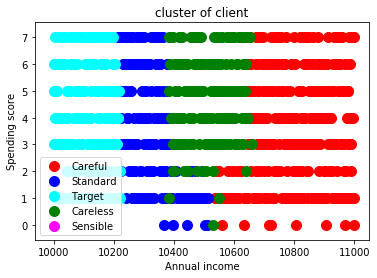

In [10]:
class Hierarchical_clustering:
    def hierarchical_model(self):
        hc =AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
        return hc

def main():
    obj=Hierarchical_clustering()
    
    hc =obj.hierarchical_model()
    print(hc)
    
    y_hc= util_obj.predict(x_train,hc)
    print("\npridict value",y_hc)
    
    print("\nvisualization of hierarchical clustering:")
    util_obj.hierachical_visualization(x_train,y_hc,hc)

if __name__ == '__main__':
    main()
 